In [1]:
import pandas as pd
import numpy as np

**Load the Dataset**

In [2]:
data=pd.read_csv('/tweets.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


**Data Preprocessing**

In [5]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)     # remove mentions
    text = re.sub(r'[^a-z\s]', '', text) # remove punctuation & numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import re
data['clean_tweet'] = data['tweet'].apply(clean_text)
data.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,love would go talk makememories unplug relax i...
3,4,0,I'm wired I know I'm George I was made that wa...,im wired know im george made way iphone cute d...
4,5,1,What amazing service! Apple won't even talk to...,amazing service apple wont even talk question ...


**Split the Data**

In [7]:
from sklearn.model_selection import train_test_split
X = data['clean_tweet']
y = data['label']   # assuming column name is 'sentiment' with values 'positive' or 'negative'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Text Vectorization**

Convert text into numerical features using **TF-IDF Vectorizer.**

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

**MODELS + Hyperparameter Tuning**

In [9]:
results = {}

In [10]:
# Model 1: Support Vector Machine (SVM)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.svm import SVC
svm_params = {"C": [0.1, 1, 10], "kernel": ["linear"]}
svm_model = GridSearchCV(SVC(), svm_params, cv=3)
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
results["SVM"] = accuracy_score(y_test, y_pred_svm)
print("\nSVM Best Params:", svm_model.best_params_)
print("SVM Accuracy:", results["SVM"])


SVM Best Params: {'C': 1, 'kernel': 'linear'}
SVM Accuracy: 0.8813131313131313


In [11]:
# Model 2: Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_params = {"alpha": [0.1, 0.5, 1.0]}
nb_model = GridSearchCV(MultinomialNB(), nb_params, cv=3)
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
results["Naive Bayes"] = accuracy_score(y_test, y_pred_nb)
print("\nNB Best Params:", nb_model.best_params_)
print("Naive Bayes Accuracy:", results["Naive Bayes"])


NB Best Params: {'alpha': 0.5}
Naive Bayes Accuracy: 0.884469696969697


In [12]:
#Model 3: Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_params = {"n_estimators":[100,200], "max_depth":[10,20,None]}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=3)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)
results["Random Forest"] = accuracy_score(y_test, y_pred_rf)
print("\nRF Best Params:", rf_model.best_params_)
print("Random Forest Accuracy:", results["Random Forest"])


RF Best Params: {'max_depth': None, 'n_estimators': 100}
Random Forest Accuracy: 0.8598484848484849


In [13]:
# Model 4: XGBoost Classifier
from xgboost import XGBClassifier
xgb_params = {"learning_rate":[0.1,0.2], "max_depth":[4,6], "n_estimators":[200]}
xgb_model = GridSearchCV(XGBClassifier(eval_metric='logloss'), xgb_params, cv=3)
xgb_model.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb_model.predict(X_test_tfidf)
results["XGBoost"] = accuracy_score(y_test, y_pred_xgb)
print("\nXGB Best Params:", xgb_model.best_params_)
print("XGBoost Accuracy:", results["XGBoost"])


XGB Best Params: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200}
XGBoost Accuracy: 0.8768939393939394


**Compare Accuracy of All Models**

In [14]:

print("Model Performance:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

best_model_name = max(results, key=results.get)
print(f"\n Best Model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

Model Performance:
SVM: 0.8813
Naive Bayes: 0.8845
Random Forest: 0.8598
XGBoost: 0.8769

 Best Model: Naive Bayes with accuracy 0.8845


In [15]:
# Store model prediction variables in a dictionary
pred_map = {
    "SVM": y_pred_svm,
    "Naive Bayes": y_pred_nb,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

# Retrieve correct predictions based on best model name
best_pred = pred_map[best_model_name]



**Confusion Matrix & Classification Report for Best Model**


Confusion Matrix:
 [[1077   75]
 [ 108  324]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1152
           1       0.81      0.75      0.78       432

    accuracy                           0.88      1584
   macro avg       0.86      0.84      0.85      1584
weighted avg       0.88      0.88      0.88      1584



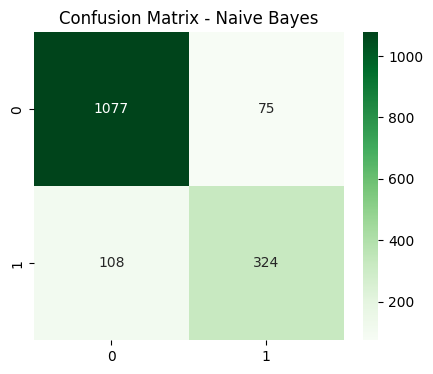

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, best_pred)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, best_pred))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()



In [17]:
# Rebuild model selection dictionary and choose best model again

model_map = {
    "SVM": svm_model,
    "Naive Bayes": nb_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Recalculate best model name from the results dictionary
best_model_name = max(results, key=results.get)

# Fetch the actual trained best model
best_model = model_map[best_model_name]

print("Best Model Selected:", best_model_name)


Best Model Selected: Naive Bayes


**Prediction**

In [19]:
new_tweets = ["This phone is amazing", "Worst laptop ever"]
new_tweets_clean = [clean_text(t) for t in new_tweets]
new_tweets_tfidf = vectorizer.transform(new_tweets_clean)

predictions = best_model.predict(new_tweets_tfidf)

for txt, p in zip(new_tweets, predictions):
    sentiment = "Positive" if p == 0 else "Negative"#In tweets data 0 represents Positive and 1 represents Negative
    print(f"{txt} : {sentiment}")


This phone is amazing : Positive
Worst laptop ever : Negative
